<a href="https://colab.research.google.com/github/jihanghaniyyah/knn-study/blob/main/diabetes_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Diabetes Classification using K-NN
**3122640035**

In [ ]:
import pandas as pd
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(diabetes_data.columns.values)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
x = diabetes_data.drop(["Outcome"], axis = 1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y = diabetes_data["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
#Split data into training and validation set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 123)

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors=1) 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(y_pred)

[0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1
 1 1 1 0 0 1 0 0 0]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

[[112  31]
 [ 33  55]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       143
           1       0.64      0.62      0.63        88

    accuracy                           0.72       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231



Predicted,0,1,All
Actual,,,
0,112,31,143
1,33,55,88
All,145,86,231


###Using MAE

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.27705627705627706
mse: 0.27705627705627706
rmse: 0.5263613559678152


Text(0, 0.5, 'Mean Error')

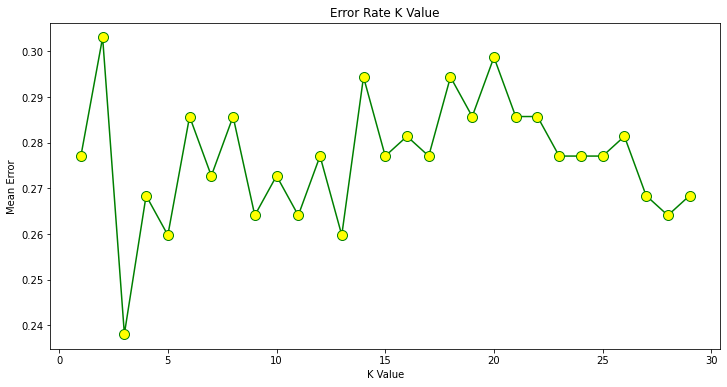

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

error = []

for i in range(1,30):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    pred_i = knn.predict(x_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='green', linestyle='-', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [ ]:
#Training and Prediction
from sklearn.neighbors import KNeighborsClassifier #import library KNN from sklearn
classifier1 = KNeighborsClassifier(n_neighbors=3) #menentukan nilai k(banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier1.fit(x_train, y_train)
#Prediction
y_pred2 = classifier1.predict(x_test)
print(y_pred2)

[1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1
 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1
 0 1 1 0 0 1 0 0 0]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2)) 
pd.crosstab(y_test, y_pred2, rownames=['Actual'], colnames=['Predicted'], margins=True)

[[118  25]
 [ 30  58]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       143
           1       0.70      0.66      0.68        88

    accuracy                           0.76       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.76      0.76       231



Predicted,0,1,All
Actual,,,
0,118,25,143
1,30,58,88
All,148,83,231


###Using F1 Score

In [ ]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

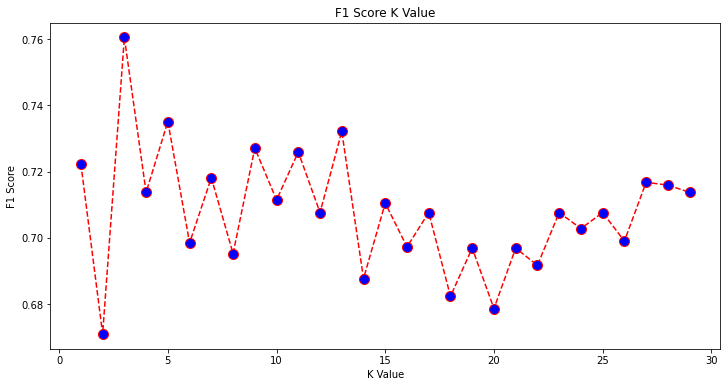

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')